# Iris Dataset

In [44]:
# Standar import
import os
# Third Party imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets 
# Local imports

In [45]:
dataset = datasets.load_iris()

In [46]:
#print(dataset['DESCR'])

In [47]:
dataset.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [48]:
feature_names = dataset['feature_names']

In [49]:
target = dataset['target']

In [50]:
data = dataset["data"]

In [51]:
dataset['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [52]:
data[:1]

array([[5.1, 3.5, 1.4, 0.2]])

In [53]:
dataset["feature_names"]

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

# Pandas DataFrame

In [54]:
df = pd.DataFrame(data, columns= feature_names)

In [55]:
df['target'] = target

In [56]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


#### Basic Descriptive Statistic

In [57]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [58]:
df['target'].head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

In [59]:
# create new column with the species name
df['target_names'] = df['target'].map({0:'setosa',1:'versicolor',2:'viriginica'})

In [60]:
df['target_names'].head()

0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
Name: target_names, dtype: object

# Exploratory Data Analysis (EDA) - PairPlot

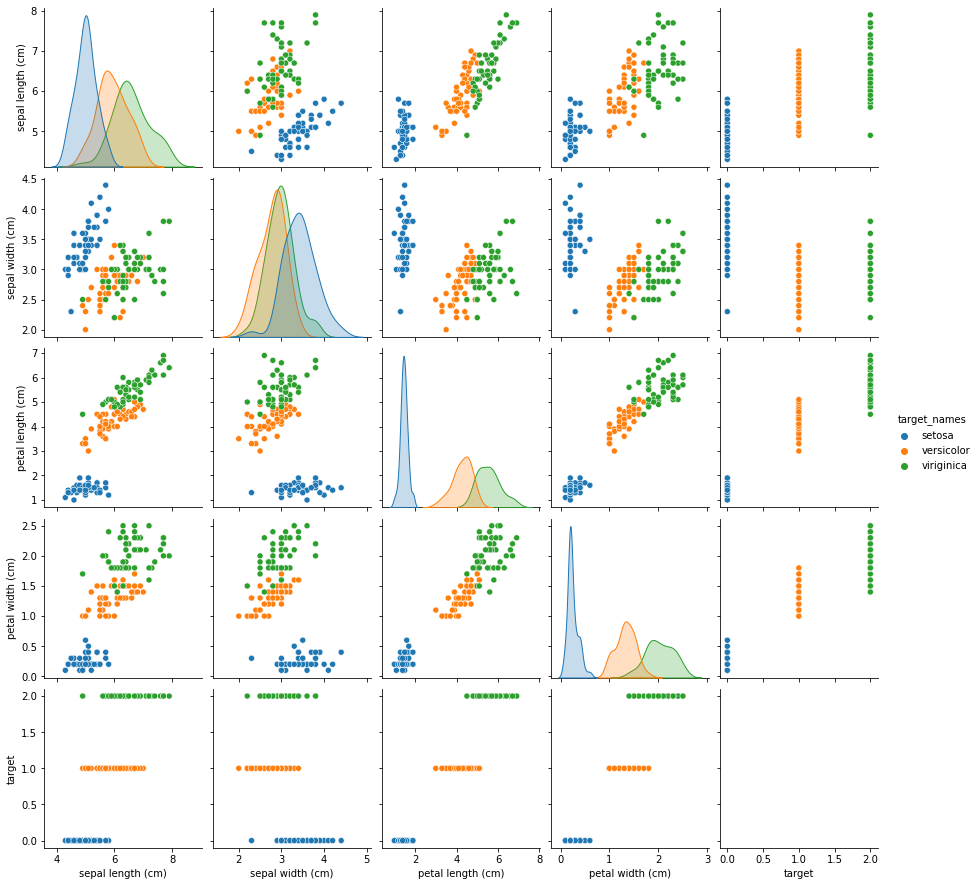

In [61]:
sns.pairplot(df, hue='target_names')

## Histogram

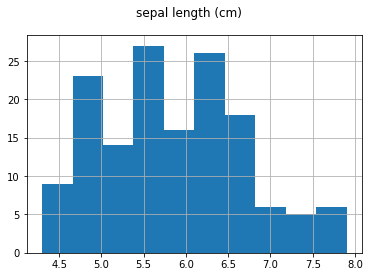

In [62]:
col = 'sepal length (cm)'
df[col].hist()
plt.suptitle(col)
plt.show()

# Train Test Split

In [63]:
from sklearn.model_selection import train_test_split 
df_train, df_test = train_test_split(df, test_size=0.25)
df_train.shape

(112, 6)

In [64]:
df_test.shape

(38, 6)

In [65]:
df_train.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_names
100,6.3,3.3,6.0,2.5,2,viriginica
85,6.0,3.4,4.5,1.6,1,versicolor
128,6.4,2.8,5.6,2.1,2,viriginica
146,6.3,2.5,5.0,1.9,2,viriginica
62,6.0,2.2,4.0,1.0,1,versicolor


In [66]:
x_train = df_train.drop(columns=['target','target_names']).values
y_train = df_train['target'].values

# Modeling - Logistic Regression Model

In [69]:
from sklearn.linear_model import LogisticRegression 
model = LogisticRegression()
xt, xv, yt, yv =  train_test_split(x_train, y_train, test_size=0.25)
model.fit(xt,yt)

LogisticRegression()

In [70]:
y_pred = model.predict(xv)

In [71]:
np.mean(y_pred == yv)

1.0

In [72]:
model.score(xv,yv) 

1.0

# Cross-Validation

### Model Tuning and Test Set Accuracy

In [73]:
from sklearn.model_selection import cross_val_score, cross_val_predict
model = LogisticRegression(max_iter=200)
accuracies = cross_val_score(estimator=model, X=x_train, y=y_train, cv=5, scoring="accuracy")
np.mean(accuracies)

0.9644268774703558

## Misclassification

In [74]:
y_predict = cross_val_predict(estimator=model, X=x_train, y=y_train, cv=5)
predicted_correctly = y_predict == y_train
not_predicted_correctly = ~predicted_correctly
x_train[~predicted_correctly]

array([[6.2, 2.8, 4.8, 1.8],
       [6.3, 2.8, 5.1, 1.5],
       [5.9, 3.2, 4.8, 1.8],
       [6. , 2.7, 5.1, 1.6]])

In [75]:
df_predictions = df_train.copy()
df_predictions["correct_predictions"] = predicted_correctly
df_predictions["prediction"] = y_predict
df_predictions["prediction_label"] = df_predictions["prediction"].map({0:'setosa',1:'versicolor',2:'viriginica'})
df_predictions.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_names,correct_predictions,prediction,prediction_label
100,6.3,3.3,6.0,2.5,2,viriginica,True,2,viriginica
85,6.0,3.4,4.5,1.6,1,versicolor,True,1,versicolor
128,6.4,2.8,5.6,2.1,2,viriginica,True,2,viriginica
146,6.3,2.5,5.0,1.9,2,viriginica,True,2,viriginica
62,6.0,2.2,4.0,1.0,1,versicolor,True,1,versicolor


<AxesSubplot:xlabel='petal length (cm)', ylabel='petal width (cm)'>

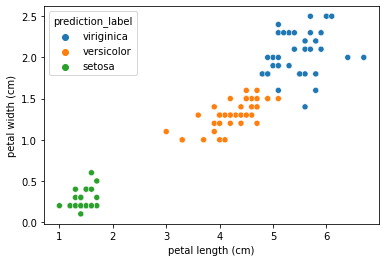

In [76]:
sns.scatterplot(x="petal length (cm)", y="petal width (cm)", hue="prediction_label", data=df_predictions)

<AxesSubplot:xlabel='petal length (cm)', ylabel='petal width (cm)'>

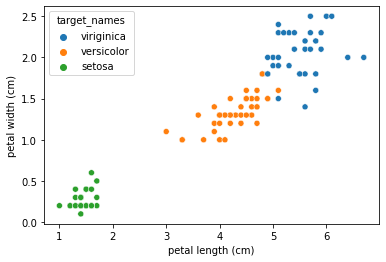

In [77]:
sns.scatterplot(x="petal length (cm)", y="petal width (cm)", hue="target_names", data=df_predictions)

In [78]:
def plot_incorrect_predictions(df_predictions, x_axis_feature, y_axis_feature):
    fig, axs = plt.subplots(2,2, figsize=(10,10))
    axs = axs.flatten()
    sns.scatterplot(x=x_axis_feature, y=y_axis_feature, hue="prediction_label", data=df_predictions, ax=axs[0])
    sns.scatterplot(x=x_axis_feature, y=y_axis_feature, hue="target_names", data=df_predictions, ax=axs[1])
    sns.scatterplot(x=x_axis_feature, y=y_axis_feature, hue="correct_predictions", data=df_predictions, ax=axs[2])
    axs[3].set_visible(False)
    
    plt.show()

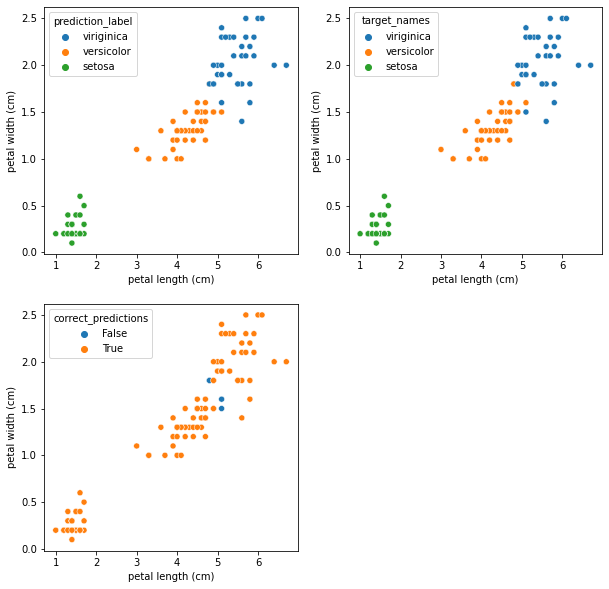

In [79]:
plot_incorrect_predictions(df_predictions,"petal length (cm)", "petal width (cm)")

# Model Adjust

In [80]:
model = LogisticRegression(max_iter=200, C=0.1)
accuracies = cross_val_score(estimator=model, X=x_train, y=y_train, cv=5, scoring="accuracy")
print(f"Accuracy:{np.mean(accuracies) * 100:.2f}%")

Accuracy:95.57%


In [81]:
model = LogisticRegression(max_iter=200, C=2)
accuracies = cross_val_score(estimator=model, X=x_train, y=y_train, cv=5, scoring="accuracy")
print(f"Accuracy:{np.mean(accuracies) * 100:.2f}%")

Accuracy:96.44%


In [82]:
model = LogisticRegression(max_iter=200, C=3)
accuracies = cross_val_score(estimator=model, X=x_train, y=y_train, cv=5, scoring="accuracy")
print(f"Accuracy:{np.mean(accuracies) * 100:.2f}%")

Accuracy:95.53%


# Final Model

In [83]:
model = LogisticRegression(max_iter=200, C=2)
model.fit(x_train, y_train)

x_test = df_test.drop(columns=["target","target_names"]).values
y_test = df_test["target"].values

y_test_predict = model.predict(x_test)

test_set_correctly_classified = y_test_predict == y_test
test_set_accuracy = np.mean(test_set_correctly_classified)


df_predictions_test = df_test.copy()
df_predictions_test["correct_predictions"] = test_set_correctly_classified
df_predictions_test["prediction"] = y_test_predict
df_predictions_test["prediction_label"] = df_predictions["prediction"].map({0:'setosa',1:'versicolor',2:'viriginica'})
df_predictions_test.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_names,correct_predictions,prediction,prediction_label
147,6.5,3.0,5.2,2.0,2,viriginica,True,2,NaN
19,5.1,3.8,1.5,0.3,0,setosa,True,0,NaN
32,5.2,4.1,1.5,0.1,0,setosa,True,0,NaN
135,7.7,3.0,6.1,2.3,2,viriginica,True,2,NaN
65,6.7,3.1,4.4,1.4,1,versicolor,True,1,NaN


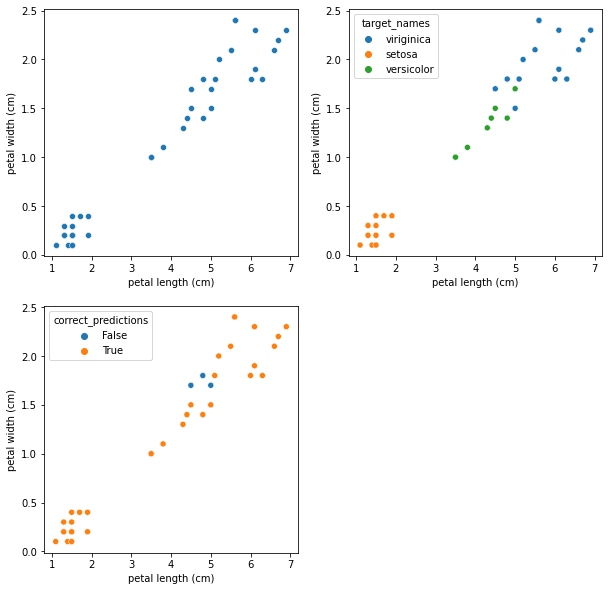

In [84]:
plot_incorrect_predictions(df_predictions_test,x_axis_feature="petal length (cm)", y_axis_feature="petal width (cm)")